In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#load dataset
pcos_df = pd.read_csv("/content/drive/MyDrive/pcos_prediction_dataset.csv")

In [5]:
#inspect the data
pcos_df.info()
pcos_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

,Age,Lifestyle Score,Undiagnosed PCOS Likelihood
count,120000.000000,120000.000000,120000.000000
mean,31.980508,5.506567,0.149937
std,10.096799,2.871052,0.057786
min,15.000000,1.000000,0.050001
25%,23.000000,3.000000,0.099820
50%,32.000000,6.000000,0.149844
75%,41.000000,8.000000,0.200061
max,49.000000,10.000000,0.249998


In [6]:
#handle missing values
pcos_df['Acne Severity'].fillna(pcos_df['Acne Severity'].mode()[0], inplace=True)


<ipython-input-6-07b95ab4dec3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pcos_df['Acne Severity'].fillna(pcos_df['Acne Severity'].mode()[0], inplace=True)


In [7]:
#track missing values as a seperate category
pcos_df['Acne Severity'].fillna("Unknown", inplace=True)

In [8]:
pcos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                120000 non-null  object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [9]:
print(pcos_df.isnull().sum())

Country                        0
Age                            0
BMI                            0
Menstrual Regularity           0
Hirsutism                      0
Acne Severity                  0
Family History of PCOS         0
Insulin Resistance             0
Lifestyle Score                0
Stress Levels                  0
Urban/Rural                    0
Socioeconomic Status           0
Awareness of PCOS              0
Fertility Concerns             0
Undiagnosed PCOS Likelihood    0
Ethnicity                      0
Diagnosis                      0
dtype: int64


In [10]:
#check duplicates
print(pcos_df.duplicated().sum())

0


In [11]:
#check datatypes
print(pcos_df.dtypes)

Country                         object
Age                              int64
BMI                             object
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                  int64
Stress Levels                   object
Urban/Rural                     object
Socioeconomic Status            object
Awareness of PCOS               object
Fertility Concerns              object
Undiagnosed PCOS Likelihood    float64
Ethnicity                       object
Diagnosis                       object
dtype: object


In [12]:
print(pcos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                120000 non-null  object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [13]:
#check unique values
unique = pcos_df. nunique()
print("Unique values Count:\n", unique)

Unique values Count:
 Country                            77
Age                                35
BMI                                 4
Menstrual Regularity                2
Hirsutism                           2
Acne Severity                       3
Family History of PCOS              2
Insulin Resistance                  2
Lifestyle Score                    10
Stress Levels                       3
Urban/Rural                         2
Socioeconomic Status                3
Awareness of PCOS                   2
Fertility Concerns                  2
Undiagnosed PCOS Likelihood    120000
Ethnicity                           5
Diagnosis                           2
dtype: int64


In [14]:
#convert categorial to numeric value
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
pcos_df['BMI'] = pcos_df['BMI'].map(bmi_mapping)

In [15]:
#Encode Categorical Variables
categorical_cols = [
    'Urban/Rural', 'Socioeconomic Status', 'Awareness of PCOS',
    'Fertility Concerns', 'Ethnicity'
]

pcos_df = pd.get_dummies(pcos_df, columns=categorical_cols, drop_first=True)

#Convert target variable to binary (Yes = 1, No = 0)
pcos_df['Diagnosis'] = pcos_df['Diagnosis'].map({'Yes': 1, 'No': 0})

In [16]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object
scaler = StandardScaler()

# Select the numerical columns
numerical_cols = ['Age', 'BMI', 'Lifestyle Score']

# Apply the scaler to the numerical columns
pcos_df[numerical_cols] = scaler.fit_transform(pcos_df[numerical_cols])

# Check the transformed data
print(pcos_df[numerical_cols].head())


        Age       BMI  Lifestyle Score
0 -0.592320  0.560174        -1.221357
1 -1.582737 -1.929074        -0.524746
2  0.893306 -0.684450         0.520171
3 -0.493278 -0.684450         1.565089
4 -0.592320  0.560174         0.520171


In [17]:
print(pcos_df.dtypes)

Country                         object
Age                            float64
BMI                            float64
Menstrual Regularity            object
Hirsutism                       object
Acne Severity                   object
Family History of PCOS          object
Insulin Resistance              object
Lifestyle Score                float64
Stress Levels                   object
Undiagnosed PCOS Likelihood    float64
Diagnosis                        int64
Urban/Rural_Urban                 bool
Socioeconomic Status_Low          bool
Socioeconomic Status_Middle       bool
Awareness of PCOS_Yes             bool
Fertility Concerns_Yes            bool
Ethnicity_Asian                   bool
Ethnicity_Caucasian               bool
Ethnicity_Hispanic                bool
Ethnicity_Other                   bool
dtype: object


In [18]:
#numerical columns
num_columns=pcos_df.select_dtypes(include=['float64','int64']).columns
num_columns=[col for col in num_columns if col.lower() != 'loan_id']
print(num_columns)

['Age', 'BMI', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood', 'Diagnosis']


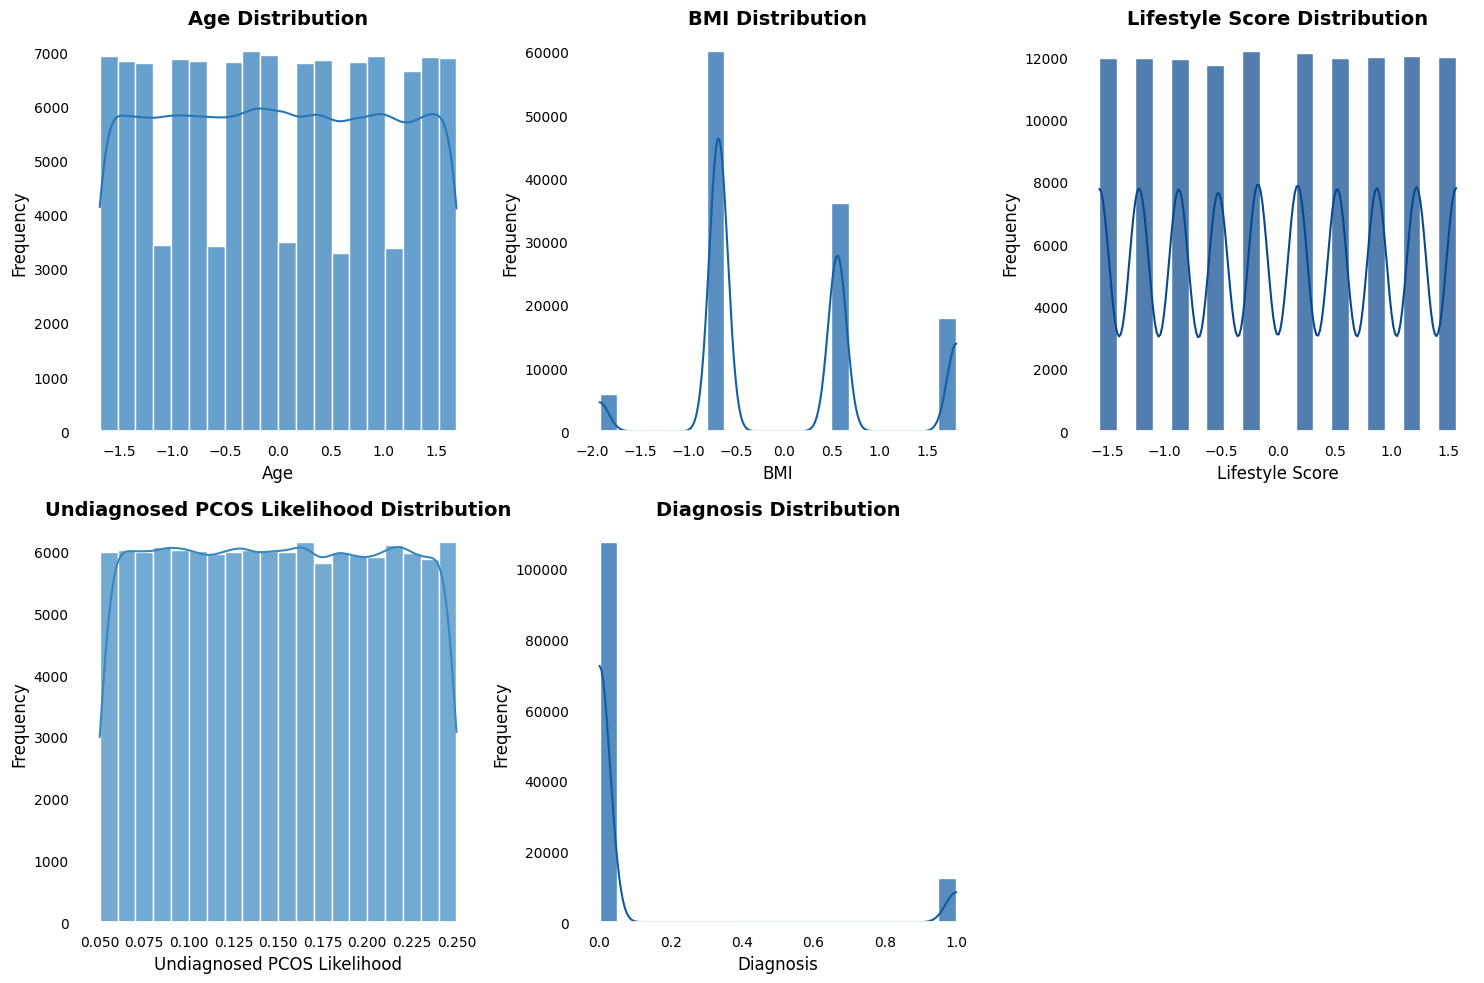

In [19]:
#histogram of numerical columns
sns.set(style="darkgrid")

num_cols=len(num_columns)
num_rows=(num_cols//3)+(num_cols%3>0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

colors = sns.color_palette('Blues', num_cols)
dark_colors = sns.color_palette("Blues", 10)[7:10]
colors[:3] = dark_colors

for i, col in enumerate(num_columns):
  sns.histplot(pcos_df[col], kde = True, bins = 20, color = colors[i], ax = axes[i], alpha= 0.7)
  axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
  axes[i].set_xlabel(col, fontsize=12, color='black')
  axes[i].set_ylabel('Frequency', fontsize=12, color='black')
  axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
  axes[i].set_facecolor('white')

for i in range(num_cols, len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

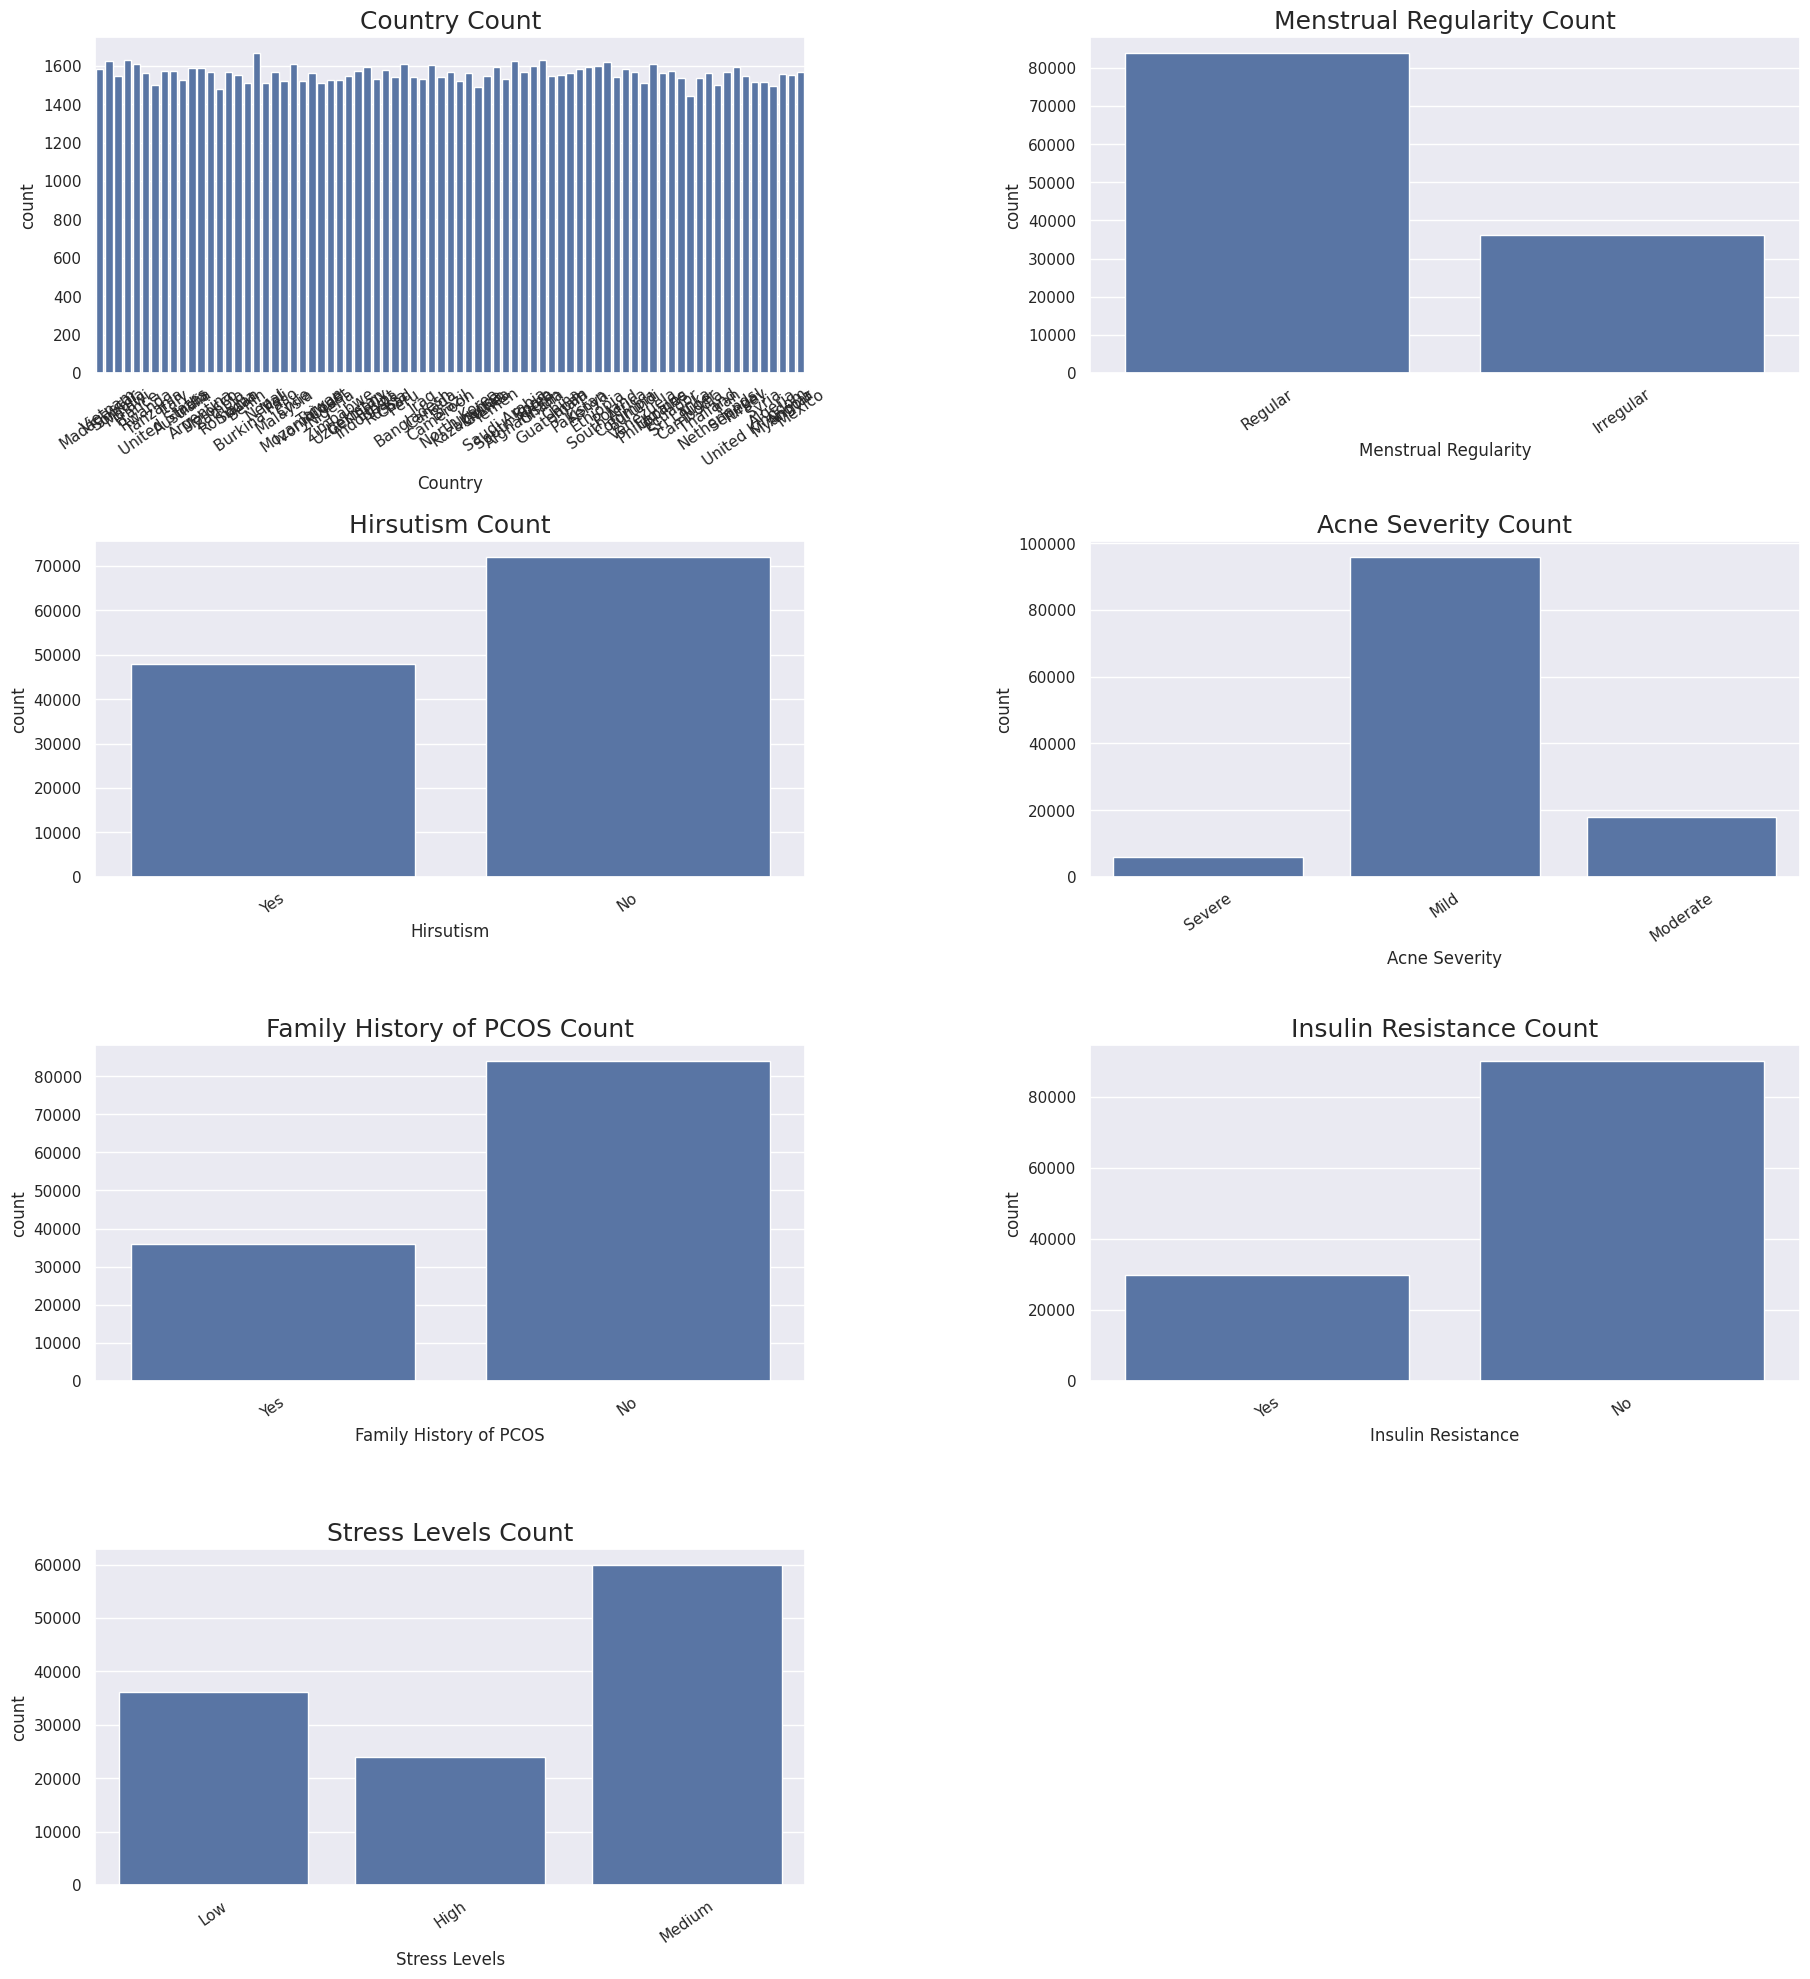

In [20]:
#subplot grid of categorial columns
cat_columns = pcos_df.select_dtypes(include=['object']).columns
cat_columns= [col for col in cat_columns if col.lower()!="id"]

# Get categorical columns and exclude 'id'
categorical_columns = pcos_df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']

# Determine rows and columns for the subplot grid
num_cols = 2  # Two plots per row
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)

# Create figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=pcos_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Count', fontsize=18)
    axes[i].tick_params(axis='x', rotation=35)

# Remove unused axes if any
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# Show the plot
plt.show()

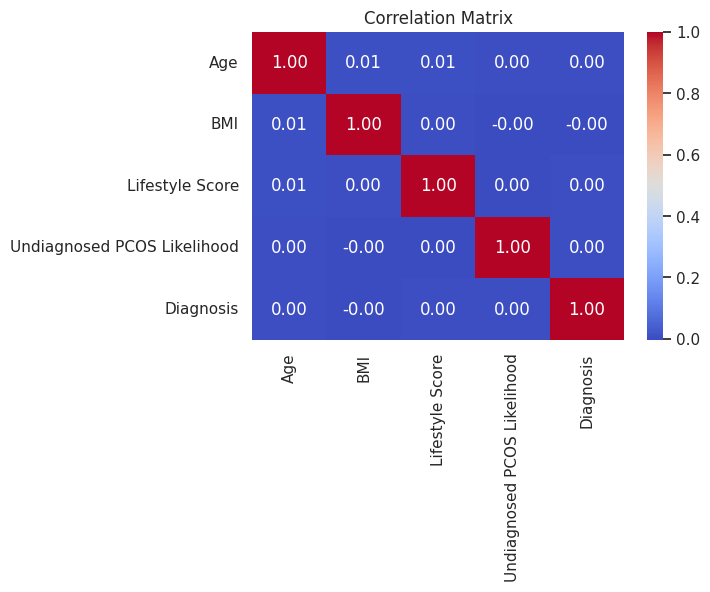

In [21]:
#heatmap of numerical columns
num_data= pcos_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

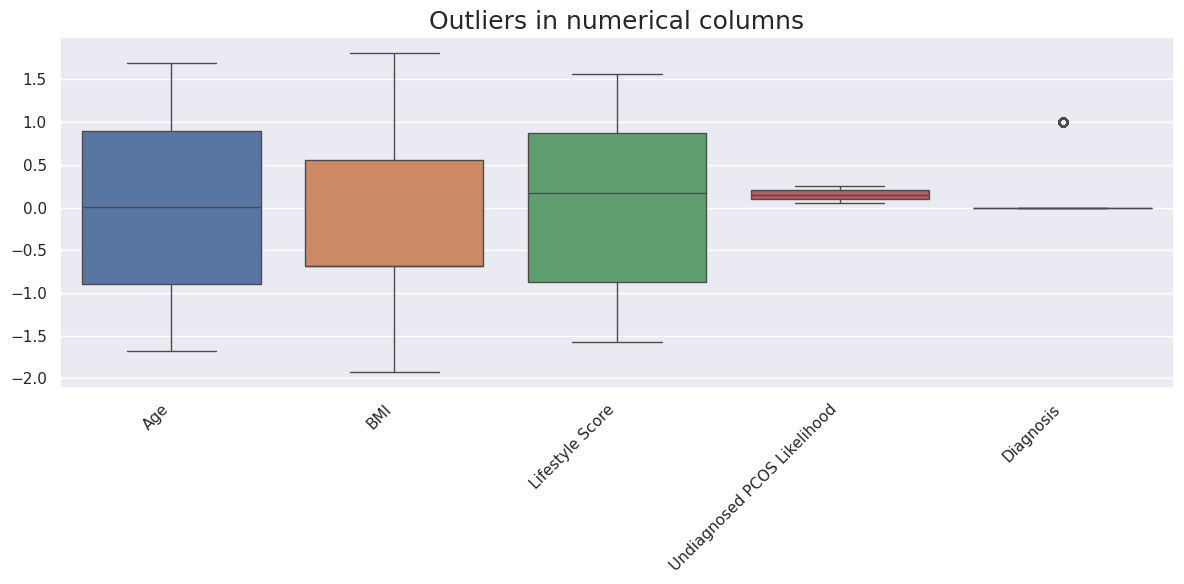

In [22]:
#Boxplot of numerical columns
num_columns = pcos_df.select_dtypes(include=['float64', 'int64']).columns
num_columns = [col for col in num_columns if col.lower() != 'id']

def outliers(df, num_columns):
  outliers = {}
  for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
num_outliers = outliers(pcos_df, num_columns)
#print(f"Outliers detected:")
#for col, outliers_df in num_outliers.items():
  #print(col)

plt.figure(figsize=(12,6))
sns.boxplot(data = pcos_df[num_columns])
plt.title("Outliers in numerical columns", fontsize = 18)
plt.xticks(rotation = 45, ha="right")
plt.tight_layout()
plt.show()

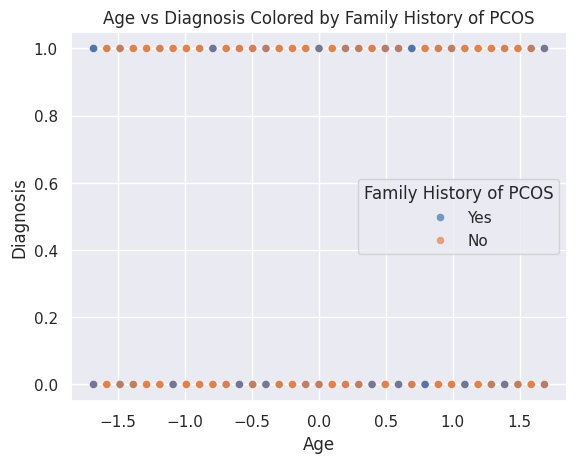

In [24]:
#Scatterplot to visualize age vs diagnosis by family history
sns.scatterplot(x=pcos_df['Age'], y=pcos_df['Diagnosis'], hue=pcos_df['Family History of PCOS'], alpha=0.7)
plt.title("Age vs Diagnosis Colored by Family History of PCOS")
plt.xlabel("Age")
plt.ylabel("Diagnosis")
plt.show()


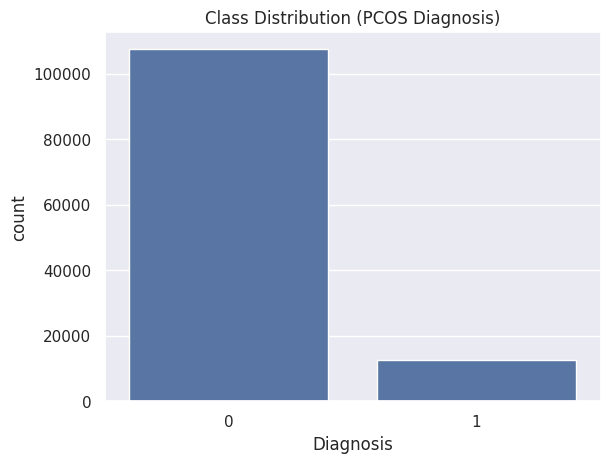

Diagnosis
0    0.895042
1    0.104958
Name: proportion, dtype: float64


In [25]:
#visualize key data
sns.countplot(x='Diagnosis', data=pcos_df)
plt.title("Class Distribution (PCOS Diagnosis)")
plt.show()

print(pcos_df['Diagnosis'].value_counts(normalize=True))  # Percentage breakdown


In [26]:
#import necessaring from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [27]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(pcos_df, drop_first=True)

In [28]:
# Define features and target variable
X = data_encoded.drop('Diagnosis', axis=1)  # Replace 'Diagnosis' with the actual target column name
y = data_encoded['Diagnosis']  # Replace with the actual target column name


In [29]:
# Convert all other boolean columns to integers
bool_columns = data_encoded.select_dtypes(include=[bool]).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Check the data types again
print(data_encoded.dtypes)

Age                            float64
BMI                            float64
Lifestyle Score                float64
Undiagnosed PCOS Likelihood    float64
Diagnosis                        int64
                                ...   
Acne Severity_Severe             int64
Family History of PCOS_Yes       int64
Insulin Resistance_Yes           int64
Stress Levels_Low                int64
Stress Levels_Medium             int64
Length: 98, dtype: object


In [30]:
##Logistic Regression from scratch:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-np.array(z, dtype=np.float64)))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

# Gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (predictions - y).reshape(-1, 1))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    return weights, cost_history

In [31]:
def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    X = np.array(X, dtype=np.float64)  # Convert X to a NumPy array with dtype float64
    y = np.array(y, dtype=np.float64)

    num_samples, num_features = X.shape  # Get number of samples and features
    weights = np.zeros(num_features)  # Initialize weights with the correct shape
    bias = 0  # Initialize bias

    for _ in range(num_iterations):
        linear_model = np.dot(X, weights) + bias  # Matrix multiplication
        y_predicted = 1 / (1 + np.exp(-np.array(linear_model, dtype=np.float64)))  # Sigmoid function

        # Compute gradients
        dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))  # Corrected dw calculation
        db = (1 / num_samples) * np.sum(y_predicted - y)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Prediction function
def predict(X, weights):
    probabilities = sigmoid(np.dot(X, weights))
    return (probabilities >= 0.2).astype(int)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [35]:
# Initialize weights
weights = np.zeros(X_train.shape[1])
learning_rate = 0.01
iterations = 1000

In [36]:
# Train the model
trained_weights, trained_bias = logistic_regression(X_train, y_train, learning_rate, iterations)

In [37]:
# Evaluate model
y_train_pred = predict(X_train, trained_weights)
y_test_pred = predict(X_test, trained_weights)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")


Train Set Evaluation:
Accuracy: 0.57
Precision: 0.10
Recall: 0.41
F1 Score: 0.17


Test Set Evaluation:
Accuracy: 0.57
Precision: 0.11
Recall: 0.42
F1 Score: 0.17



In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
#Model 1
# Decision Tree Model
dt_model = DecisionTreeClassifier() #create model
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8047916666666667
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     21457
           1       0.10      0.11      0.11      2543

    accuracy                           0.80     24000
   macro avg       0.50      0.50      0.50     24000
weighted avg       0.81      0.80      0.81     24000



In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Model 2
# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8940416666666666
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21457
           1       0.00      0.00      0.00      2543

    accuracy                           0.89     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.89      0.84     24000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
# Evaluating which model performs better based on Accuracy and F1-Score
# You can also compare precision and recall if needed.
if accuracy_dt > accuracy_rf:
  print("Decision Tree performed better based on accuracy.")
else:
  print("Random Forest performed better based on accuracy.")

Random Forest performed better based on accuracy.


In [43]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Defining the hyperparameters to tune for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perom GridSearch with Cross-Validation for Decision Tree
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', n_jobs=1)
grid_search_dt.fit(X_train, y_train)

# Best Hyperparameters for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Cross-Validation Score for Decision Tree with best parameters
dt_cv_scores = cross_val_score(grid_search_dt.best_estimator_, X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f}")

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Cross-Validation Accuracy: 0.8940


In [57]:
#Random Forest Hyperparameter Tuning Model no: 2

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [10],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=1)
grid_search_rf.fit(X_train, y_train.ravel())  # <-- Fix applied here

# Best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Cross-Validation Score
rf_cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train.ravel(), cv=5)  # <-- Fix applied here
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")

<ipython-input-57-9762b39b99a2>:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  grid_search_rf.fit(X_train, y_train.ravel())  # <-- Fix applied here


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


<ipython-input-57-9762b39b99a2>:21: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_cv_scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train.ravel(), cv=5)  # <-- Fix applied here


Random Forest Cross-Validation Accuracy: 0.8953


In [48]:
from sklearn.impute import SimpleImputer

# Impute missing values (using median for numerical features)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [49]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_imputed)
X_test = scaler.transform(X_test_imputed)

In [51]:
# Feature Selection
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Printing the selected features indices and the feature scores
print("Selected Features for Decision Tree:")
selected_feature_dt = selector.get_support(indices=True)
print("Feature indices:", selected_feature_dt)
print("Feature scores:", selector.scores_)

# Training the Decision Tree model on the selected Features
dt_selected = DecisionTreeClassifier()
dt_selected.fit(X_train_selected, y_train)

# Evaluating the model on the test set
y_pred_selected_dt = dt_selected.predict(X_test_selected)
accuray_selected_dt = accuracy_score(y_test, y_pred_selected_dt)
print(f"Decision Tree Accuracy with Selected Features Accuracy: {accuray_selected_dt:.4f}")


Selected Features for Decision Tree:
Feature indices: [ 6 95 96]
Feature scores: [0.         0.00428223 0.00194645 0.00019137 0.00697949 0.0089181
 0.00999497 0.00812061 0.00691279 0.00735637 0.00735645 0.00823579
 0.00612553 0.         0.00123891 0.00098739 0.00202431 0.00046677
 0.00051133 0.00196043 0.00046177 0.00156914 0.00341433 0.00351228
 0.00133976 0.00202165 0.00202097 0.         0.00079157 0.00113029
 0.00239316 0.00255855 0.00072808 0.00057499 0.00167239 0.00195765
 0.         0.00149893 0.00295968 0.         0.002558   0.00182245
 0.00122131 0.0021272  0.0019179  0.0029631  0.00178292 0.00158867
 0.00167596 0.00164505 0.0028601  0.00118813 0.0013678  0.00238927
 0.00206238 0.00123234 0.00016697 0.00077766 0.00142523 0.0022836
 0.00033644 0.00194687 0.         0.00134738 0.000952   0.00198411
 0.         0.00303726 0.00239984 0.00298955 0.         0.
 0.00096945 0.00160696 0.00250251 0.00080214 0.00244962 0.00231668
 0.0028259  0.00226287 0.         0.00295339 0.00261367 0.

In [54]:
from sklearn.feature_selection import SelectFromModel

rf_model.fit(X_train, y_train)
# Feature Selection
selector_rf = SelectFromModel(rf_model, max_features=3, prefit=True)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Printing the selected features indices and the feature scores
print("Selected Features for Random Forest:")
selected_feature_dt = selector_rf.get_support(indices=True)
print("Feature indices:", selected_feature_dt)
print("Feature scores:", selector.scores_)

# Training the Decision Tree model on the selected Features
dt_selected = RandomForestClassifier()
dt_selected.fit(X_train_selected, y_train)

# Evaluating the model on the test set
y_pred_selected_dt = dt_selected.predict(X_test_selected)
accuray_selected_dt = accuracy_score(y_test, y_pred_selected_dt)
print(f"Random Forest Accuracy with Selected Features Accuracy: {accuray_selected_dt:.4f}")

Selected Features for Random Forest:
Feature indices: [0 2 3]
Feature scores: [1.62450850e-03 2.45992406e-03 2.79420728e-03 1.91365956e-04
 6.70763771e-03 8.87366241e-03 1.14510947e-02 9.47955168e-03
 7.43169204e-03 5.78060832e-03 8.78841107e-03 7.06436961e-03
 6.21731382e-03 1.80539861e-03 1.62197628e-03 3.09405793e-03
 2.73224972e-03 4.66699765e-04 0.00000000e+00 1.08541241e-03
 6.99989142e-04 2.53867241e-03 1.87234069e-03 1.39403893e-03
 6.49884866e-04 1.09471373e-03 0.00000000e+00 1.74617421e-03
 2.53877523e-03 1.05217601e-03 8.39893218e-04 0.00000000e+00
 0.00000000e+00 2.19473561e-04 2.17521913e-03 5.98564452e-04
 1.79881965e-03 3.00136996e-03 1.67546734e-03 1.79262681e-03
 2.15656525e-03 2.51059778e-03 2.02031130e-03 4.15662167e-05
 1.74114009e-03 1.44623676e-03 3.18571755e-04 1.00123579e-03
 1.42341704e-03 2.08680926e-03 3.85909386e-03 2.58343870e-03
 1.30188230e-03 1.32929095e-03 1.43893926e-03 1.88661857e-03
 0.00000000e+00 1.49566714e-03 7.83737883e-05 1.36344751e-04
 1.3243

In [55]:
# Final Model For Random Forest
# Using best hyperparameters from GridSearchCV
best_params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 10
}

# Train Random Forest with Best Hyperparameters
rf_final = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    random_state=42
)

# Feature Selection using SelectFromModel
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=3)
rf_selector.fit(X_train, y_train.ravel())  # Convert y_train to 1D

# Get selected feature indices
selected_feature_indices = rf_selector.get_support(indices=True)
X_train_selected_rf = X_train[:, selected_feature_indices]  # Use NumPy indexing
X_test_selected_rf = X_test[:, selected_feature_indices]  # Use NumPy indexing

# Fit the final Random Forest model
rf_final.fit(X_train_selected_rf, y_train.ravel())  # Convert y_train to 1D

# Make predictions on the test data
y_pred_rf_final = rf_final.predict(X_test_selected_rf)

# Calculate performance metrics
accuracy_rf_final = accuracy_score(y_test, y_pred_rf_final)
precision_rf_final = precision_score(y_test, y_pred_rf_final, average='weighted')
recall_rf_final = recall_score(y_test, y_pred_rf_final, average='weighted')
f1_rf_final = f1_score(y_test, y_pred_rf_final, average='weighted')

# Print results
print(f"Final Random Forest Accuracy: {accuracy_rf_final:.4f}")
print(f"Final Random Forest Precision: {precision_rf_final:.4f}")
print(f"Final Random Forest Recall: {recall_rf_final:.4f}")
print(f"Final Random Forest F1 Score: {f1_rf_final:.4f}")


<ipython-input-55-601330e6fd47>:25: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_selector.fit(X_train, y_train.ravel())  # Convert y_train to 1D
<ipython-input-55-601330e6fd47>:33: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_final.fit(X_train_selected_rf, y_train.ravel())  # Convert y_train to 1D


Final Random Forest Accuracy: 0.8940
Final Random Forest Precision: 0.7993
Final Random Forest Recall: 0.8940
Final Random Forest F1 Score: 0.8440


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


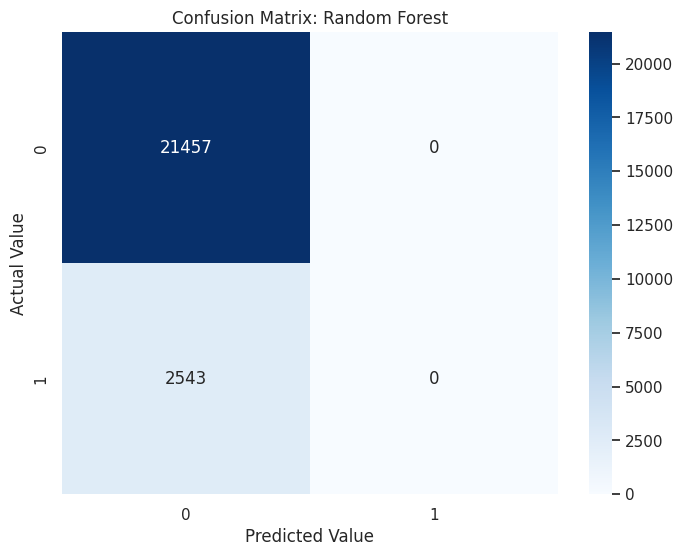

In [56]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred_rf_final)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_final.classes_, yticklabels=rf_final.classes_)
plt.title("Confusion Matrix: Random Forest")
plt.ylabel("Actual Value")
plt.xlabel("Predicted Value")
plt.show()